[0.89230769 0.89230769 0.89230769 0.89230769 0.89230769 0.89230769
 0.89230769 0.88461538 0.88461538 0.88461538]
Accuracy score = 0.89
time for training and predicting the test sets = 95.15459582999938 s
accuracy score = 0.8807692307692307
[[3.36735983e-01 1.10610000e+04]
 [3.36655279e-01 1.10630000e+04]
 [3.36282466e-01 1.10650000e+04]
 ...
 [3.08444222e-01 1.21620000e+04]
 [3.08444222e-01 1.21630000e+04]
 [3.08444222e-01 1.21640000e+04]]


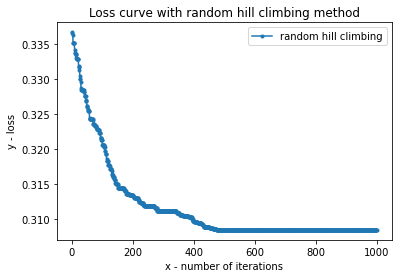

In [83]:
# Dataset 1 : Movie
# Output : Awards : Yes or No
# NeuralNetwork with Random hill climbing

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt
import mlrose_hiive

# split your datas between training and test
from sklearn.model_selection import train_test_split
# comparing datas
from sklearn.metrics import accuracy_score
# cross validation
from sklearn.model_selection import cross_val_score
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
labelencoder_X = LabelEncoder()

#dataset
a = io.open('Movie Dataset.csv', encoding='latin-1')
df1 = pd.read_csv(a)
df = df1.dropna(subset=['Awards'])
df = df.take([i for i in range(1300)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['Awards'])

#output
y = df['Awards']

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

time1 = time.perf_counter()

max_iters_rhc = 1000
restarts = 10

model_rhc = mlrose_hiive.NeuralNetwork(activation='relu', algorithm='random_hill_climb', max_iters=max_iters_rhc, 
                                   learning_rate=0.1, restarts=restarts, max_attempts=max_iters, 
                                   random_state=1, curve=True)

model_rhc.fit(X_train,y_train)

validation = cross_val_score(model_rhc, X, y, cv=10)
print(validation)
print('Accuracy score =', validation.mean())

#Testing the test set
predictions = model_rhc.predict(X_test)
score = accuracy_score(y_test,predictions)

#time after training and predicting the test sets
time2 = time.perf_counter()
timeA = time2 - time1
print('time for training and predicting the test sets =',timeA,'s')

print('accuracy score =', score)

print(model_rhc.fitness_curve)
max_iters_rhc = 1000
x_iterations_rhc = np.linspace(1,max_iters_rhc ,max_iters_rhc,dtype="int")

# plotting the graph

fig, ax = plt.subplots()
ax.plot(x_iterations_rhc , model_rhc.fitness_curve[:,0] , marker=".", label="random hill climbing")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - loss')
ax.set_title('Loss curve with random hill climbing method')
ax.legend()
plt.show()

[0.89247312 0.89247312 0.88709677 0.88709677 0.88709677 0.89189189
 0.89189189]
Accuracy score = 0.8900029061319384
time for training and predicting the test sets = 11.7421985889996 s
Test score = 0.9
[[3.45827002e-01 3.00000000e+00]
 [3.46060465e-01 5.00000000e+00]
 [3.46290299e-01 7.00000000e+00]
 ...
 [3.37786357e-01 1.86000000e+03]
 [3.37430084e-01 1.86200000e+03]
 [3.37430084e-01 1.86300000e+03]]


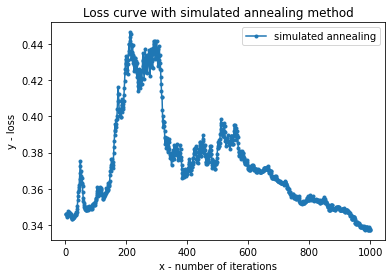

In [66]:
# Dataset 2 : Wines
# Output : Type of wine : red or white
# NeuralNetwork() with simulated annealing

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt
import mlrose_hiive

# split your datas between training and test
from sklearn.model_selection import train_test_split
# comparing datas
from sklearn.metrics import accuracy_score
# cross validation
from sklearn.model_selection import cross_val_score
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

labelencoder_X = LabelEncoder()

#dataset
a = io.open('Movie Dataset.csv', encoding='latin-1')
df1 = pd.read_csv(a)
df = df1.dropna(subset=['Awards'])
df = df.take([i for i in range(1300)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['Awards'])

#output
y = df['Awards']

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

time1 = time.perf_counter()

max_iters_sa = 1000

model_sa = mlrose_hiive.NeuralNetwork(activation = 'relu',algorithm = 'simulated_annealing', max_iters = max_iters_sa, 
                                   schedule = mlrose_hiive.GeomDecay(), learning_rate = 0.1, 
                                   max_attempts = max_iters_sa, random_state = 1, curve = True)

model_sa.fit(X_train,y_train)

validation = cross_val_score(model_sa, X, y, cv=7)
print(validation)
print('Accuracy score =', validation.mean())

#Testing the test set
predictions = model_sa.predict(X_test)
score = accuracy_score(y_test,predictions)

#time after training and predicting the test sets
time2 = time.perf_counter()
timeA = time2 - time1
print('time for training and predicting the test sets =',timeA,'s')

print('Test score =', score)

print(model_sa.fitness_curve)
x_iterations_sa = np.linspace(1,max_iters_sa ,max_iters_sa,dtype="int")

# plotting the graph

fig, ax = plt.subplots()
ax.plot(x_iterations_sa , model_sa.fitness_curve[:,0] , marker=".", label="simulated annealing")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - loss')
ax.set_title('Loss curve with simulated annealing method')
ax.legend()
plt.show()

[0.79032258 0.89247312 0.88709677 0.88709677 0.88709677 0.89189189
 0.81621622]
Accuracy score = 0.8645991613733549
time for training and predicting the test sets = 1396.983375194999 s
Test score = 0.8807692307692307
[   3.    5.    7.    9.   11.   13.   15.   17.   19.   21.   23.   25.
   27.   29.   31.   33.   35.   37.   39.   41.   43.   45.   47.   49.
   51.   53.   55.   57.   59.   61.   63.   65.   67.   69.   71.   73.
   75.   77.   79.   81.   83.   85.   87.   89.   91.   93.   95.   97.
   99.  101.  103.  105.  107.  109.  111.  113.  115.  117.  119.  121.
  123.  125.  127.  129.  131.  133.  135.  137.  139.  141.  143.  145.
  147.  149.  151.  153.  155.  157.  159.  161.  163.  165.  167.  169.
  171.  173.  175.  177.  179.  181.  183.  185.  187.  189.  191.  193.
  195.  197.  199.  201.  203.  205.  207.  209.  211.  213.  215.  217.
  219.  221.  223.  225.  227.  229.  231.  233.  235.  237.  239.  241.
  243.  245.  247.  249.  251.  253.  255.  257.  259

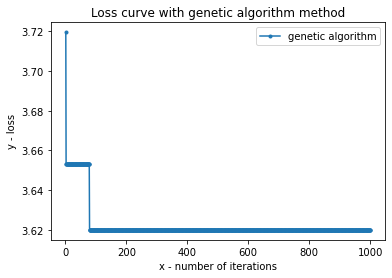

In [69]:
# Dataset 2 : Wines
# Output : Type of wine : red or white
# NeuralNetwork() with genetic algorithm

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt
import mlrose_hiive

# split your datas between training and test
from sklearn.model_selection import train_test_split
# comparing datas
from sklearn.metrics import accuracy_score
# cross validation
from sklearn.model_selection import cross_val_score
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

labelencoder_X = LabelEncoder()

#dataset
a = io.open('Movie Dataset.csv', encoding='latin-1')
df1 = pd.read_csv(a)
df = df1.dropna(subset=['Awards'])
df = df.take([i for i in range(1300)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['Awards'])

#output
y = df['Awards']

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

time1 = time.perf_counter()

max_iters_ga = 1000

model_ga = mlrose_hiive.NeuralNetwork(activation = 'relu',algorithm = 'genetic_alg', pop_size = 200, 
                                      max_iters = max_iters_ga, 
                                   learning_rate = 0.1, mutation_prob = 0.1, max_attempts = max_iters_ga, random_state = 1, 
                                   curve = True)

model_ga.fit(X_train,y_train)

validation = cross_val_score(model_ga, X, y, cv=7)
print(validation)
print('Accuracy score =', validation.mean())

#Testing the test set
predictions = model_ga.predict(X_test)
score = accuracy_score(y_test,predictions)

#time after training and predicting the test sets
time2 = time.perf_counter()
timeA = time2 - time1
print('time for training and predicting the test sets =',timeA,'s')

print('Test score =', score)

print(model_sa.fitness_curve[:,0])
x_iterations_ga = np.linspace(1,max_iters_ga ,max_iters_ga,dtype="int")

# plotting the graph

fig, ax = plt.subplots()
ax.plot(x_iterations_ga , model_ga.fitness_curve[:,0] , marker=".", label="genetic algorithm")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - loss')
ax.set_title('Loss curve with genetic algorithm method')
ax.legend()
plt.show()

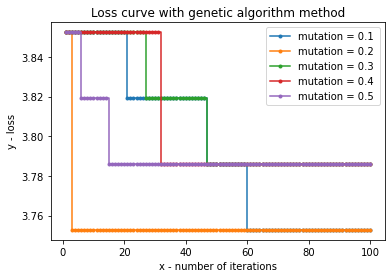

In [98]:
# GA mutation
import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt
import mlrose_hiive

# split your datas between training and test
from sklearn.model_selection import train_test_split
# comparing datas
from sklearn.metrics import accuracy_score
# cross validation
from sklearn.model_selection import cross_val_score
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

labelencoder_X = LabelEncoder()

#dataset
a = io.open('Movie Dataset.csv', encoding='latin-1')
df1 = pd.read_csv(a)
df = df1.dropna(subset=['Awards'])
df = df.take([i for i in range(1300)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['Awards'])

#output
y = df['Awards']

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

list_loss = []

time1 = time.perf_counter()

max_iters_ga = 100

for i in range(1,6):
    
    model_ga = mlrose_hiive.NeuralNetwork(activation = 'relu',algorithm = 'genetic_alg', pop_size = 200, 
                                      max_iters = max_iters_ga, 
                                   learning_rate = 0.1, mutation_prob = i/10, max_attempts = max_iters_ga, random_state = 1, 
                                   curve = True)

    model_ga.fit(X_train,y_train)
    list_loss.append(model_ga.fitness_curve[:,0])


x_iterations_ga = np.linspace(1,max_iters_ga ,max_iters_ga,dtype="int")

# plotting the graph

fig, ax = plt.subplots()
for i in range(1,6):
    ax.plot(x_iterations_ga , list_loss[i-1] , marker=".",label='mutation = {} '.format(i/10),drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - loss')
ax.set_title('Loss curve with genetic algorithm method')
ax.legend()
plt.show()

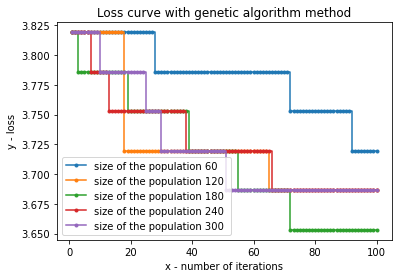

In [95]:
# GA population
import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt
import mlrose_hiive

# split your datas between training and test
from sklearn.model_selection import train_test_split
# comparing datas
from sklearn.metrics import accuracy_score
# cross validation
from sklearn.model_selection import cross_val_score
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder,MinMaxScaler

labelencoder_X = LabelEncoder()

#dataset
a = io.open('Movie Dataset.csv', encoding='latin-1')
df1 = pd.read_csv(a)
df = df1.dropna(subset=['Awards'])
df = df.take([i for i in range(1300)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['Awards'])

#output
y = df['Awards']

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

list_loss = []

time1 = time.perf_counter()

max_iters_ga = 100

for i in range(1,6):
    
    model_ga = mlrose_hiive.NeuralNetwork(activation = 'relu',algorithm = 'genetic_alg', pop_size = 60*i, 
                                      max_iters = max_iters_ga, learning_rate = 0.1, mutation_prob = 0.1, 
                                          max_attempts = max_iters_ga, random_state = 1, curve = True)

    model_ga.fit(X_train,y_train)
    list_loss.append(model_ga.fitness_curve[:,0])


x_iterations_ga = np.linspace(1,max_iters_ga ,max_iters_ga,dtype="int")

# plotting the graph

fig, ax = plt.subplots()
for i in range(1,6):
    ax.plot(x_iterations_ga , list_loss[i-1] , marker=".", label='size of the population {} '.format(60*i),drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - loss')
ax.set_title('Loss curve with genetic algorithm method')
ax.legend()
plt.show()

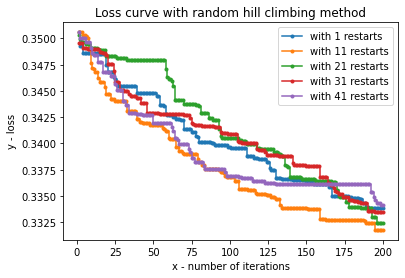

In [97]:
# Vary the number of restarts

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt
import mlrose_hiive

# split your datas between training and test
from sklearn.model_selection import train_test_split
# comparing datas
from sklearn.metrics import accuracy_score
# cross validation
from sklearn.model_selection import cross_val_score
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
labelencoder_X = LabelEncoder()

#dataset
a = io.open('Movie Dataset.csv', encoding='latin-1')
df1 = pd.read_csv(a)
df = df1.dropna(subset=['Awards'])
df = df.take([i for i in range(1300)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['Awards'])

#output
y = df['Awards']

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

max_iters_rhc = 200

list_loss_rhc = []

for i in range(1,6):
    model_rhc = mlrose_hiive.NeuralNetwork(activation='relu', algorithm='random_hill_climb', max_iters=max_iters_rhc, 
                                   learning_rate=0.1, restarts=i, max_attempts=max_iters, 
                                   random_state=1, curve=True)

    model_rhc.fit(X_train,y_train)
    list_loss_rhc.append(model_rhc.fitness_curve[:,0])


x_iterations_rhc = np.linspace(1,max_iters_rhc ,max_iters_rhc,dtype="int")

# plotting the graph

fig, ax = plt.subplots()
for i in range(1,6):
    ax.plot(x_iterations_rhc , list_loss_rhc[i-1] , marker=".", label='with {} restarts'.format(10*(i-1)+1),drawstyle="steps-post")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - loss')
ax.set_title('Loss curve with random hill climbing method')
ax.legend()
plt.show()

[0.89247312 0.89247312 0.88172043 0.88709677 0.88709677 0.89189189
 0.89189189]
Accuracy score = 0.8892348569767925
time for training and predicting the test sets = 11.810971616001552 s
Test score = 0.9


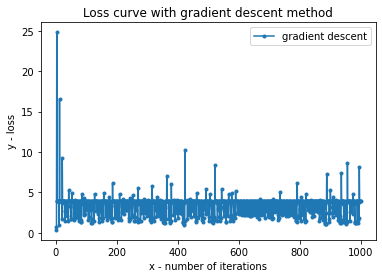

In [58]:
# Dataset 2 : Wines
# Output : Movie awards : Yes or No
# NeuralNetwork() with gradient descent

import numpy as np
import time
import pandas as pd
import io
import matplotlib.pyplot as plt
import mlrose_hiive

# split your datas between training and test
from sklearn.model_selection import train_test_split
# comparing datas
from sklearn.metrics import accuracy_score
# cross validation
from sklearn.model_selection import cross_val_score
# will be used to convert string into float
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

labelencoder_X = LabelEncoder()

#dataset
#dataset
a = io.open('Movie Dataset.csv', encoding='latin-1')
df1 = pd.read_csv(a)
df = df1.dropna(subset=['Awards'])
df = df.take([i for i in range(1300)], axis = 0)
df = df.apply(LabelEncoder().fit_transform)

#input
X = df.drop(columns=['Awards'])

#output
y = df['Awards']

scaler = MinMaxScaler()

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

time1 = time.perf_counter()

max_iters_gd = 1000

model_gd = mlrose_hiive.NeuralNetwork(activation = 'relu',algorithm = 'gradient_descent', max_iters = max_iters_gd, 
                                 learning_rate = 0.1, max_attempts = max_iters, random_state = 1, curve = True)

model_gd.fit(X_train,y_train)

validation = cross_val_score(model_gd, X, y, cv=7)
print(validation)
print('Accuracy score =', validation.mean())

#Testing the test set
predictions = model_gd.predict(X_test)
score = accuracy_score(y_test,predictions)

#time after training and predicting the test sets
time2 = time.perf_counter()
timeA = time2 - time1
print('time for training and predicting the test sets =',timeA,'s')

print('Test score =', score)

x_iterations = np.linspace(1,max_iters_gd ,max_iters_gd,dtype="int")
model_gd.fitness_curve

# plotting the graph

fig, ax = plt.subplots()
ax.plot(x_iterations , -model_gd.fitness_curve , marker=".", label="gradient descent")
ax.set_xlabel('x - number of iterations')
ax.set_ylabel('y - loss')
ax.set_title('Loss curve with gradient descent method')
ax.legend()
plt.show()

In [22]:
mlrose_hiive.neural.fitness.network_weights.NetworkWeights

mlrose_hiive.neural.fitness.network_weights.NetworkWeights

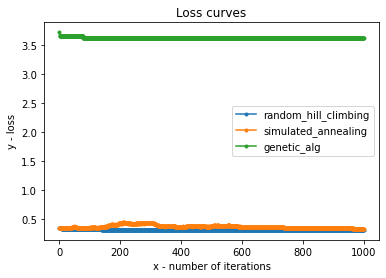

In [70]:
x_iterations_gd = np.linspace(1,max_iters_gd ,max_iters_gd,dtype="int")
x_iterations_rhc = np.linspace(1,max_iters_rhc ,max_iters_rhc,dtype="int")
x_iterations_sa = np.linspace(1,max_iters_sa ,max_iters_sa,dtype="int")
x_iterations_ga = np.linspace(1,max_iters_ga ,max_iters_ga,dtype="int")

fig, ax = plt.subplots()
#ax.plot(x_iterations_gd , -model_gd.fitness_curve ,marker=".", label="gradient descent")
ax.plot(x_iterations_rhc , model_rhc.fitness_curve[:,0] , marker=".", label="random_hill_climbing")
ax.plot(x_iterations_sa , model_sa.fitness_curve[:,0] ,marker=".",label="simulated_annealing")
ax.plot(x_iterations_ga , model_ga.fitness_curve[:,0] ,marker=".",label="genetic_alg")
ax.set_xlabel("x - number of iterations")
ax.set_ylabel("y - loss")
ax.set_title("Loss curves")
ax.legend()
plt.show()